In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
#The os.chdir() function in Python changes the current working
#directory for the duration of the Python script's execution.
os.chdir('drive/MyDrive/UCLA_WiDS_Team 2/DATA/TRAIN')

In [3]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [4]:
train_df = pd.read_csv('train_data.csv')
train_df

,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,0,0,0,0,1,0,0,0,0,...,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368,1,0
1,00fV0OyyoLfw,0,0,1,0,0,0,1,0,0,...,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951,1,0
2,04X1eiS79T4B,0,0,1,0,0,0,1,0,0,...,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812,0,1
3,05ocQutkURd6,0,0,0,1,0,0,1,0,0,...,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943,0,1
4,06YUNBA9ZRLq,0,0,0,1,0,0,1,0,0,...,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,0,0,1,0,0,0,1,0,0,...,0.025603,0.012846,0.091032,0.071392,0.045143,0.087861,0.124018,0.198580,1,0
1209,zpr8w4jCfVPe,0,0,0,0,1,0,0,0,1,...,0.043203,0.000718,0.161472,0.101601,0.076582,0.172203,0.134200,0.166221,1,0
1210,zwBG0rZ05Mcb,0,1,0,0,0,0,1,0,0,...,-0.013726,-0.079526,0.099933,-0.009852,0.038169,0.182069,0.080787,0.123945,0,0
1211,zwXD5v17Rx01,0,0,0,1,0,0,1,0,0,...,0.033677,-0.019995,0.143186,-0.035425,0.162715,0.068137,0.093588,0.144960,1,0


In [5]:
print(os.getcwd())
os.chdir('../TEST')
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1DT5jiAO8l-XWeN2n5Uk8RvuF1jZUaJoF/UCLA_WiDS_Team_2/DATA/TRAIN
/content/drive/.shortcut-targets-by-id/1DT5jiAO8l-XWeN2n5Uk8RvuF1jZUaJoF/UCLA_WiDS_Team_2/DATA/TEST


In [6]:
test_df = pd.read_csv('test_data.csv')
test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_4,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,0,1,0,1,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,0,1,0,1,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,0,1,0,1,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,0,1,0,1,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,0,1,0,1,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,0,1,0,1,0,1,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,0,1,0,1,0,1,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,0,0,1,1,0,1,0,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,0,1,0,1,0,0,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [7]:
adhd = train_df['ADHD_Outcome']
sex = train_df['Sex_F']

In [8]:
num_adhd = train_df['ADHD_Outcome'].value_counts()
num_adhd    #noticed the values are imbalanced

,count
ADHD_Outcome,
1,831
0,382


In [9]:
num_sex = train_df['Sex_F'].value_counts()
num_sex     #noticed the values are imbalanced

,count
Sex_F,
0,797
1,416


In [10]:
def drop_uncommon_columns(df1, df2):
    # Find common columns
    common_columns = df1.columns.intersection(df2.columns)

    # Keep only common columns
    df1 = df1[common_columns]
    df2 = df2[common_columns]

    return df1, df2

train_df, test_df = drop_uncommon_columns(train_df, test_df)

test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [11]:
train_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,1,0,1,0,1,0,0,1,0,...,0.066630,0.053134,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368
1,00fV0OyyoLfw,0,0,0,1,0,0,0,0,0,...,0.050297,-0.063647,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951
2,04X1eiS79T4B,0,0,0,0,1,0,0,0,0,...,-0.047927,0.089904,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812
3,05ocQutkURd6,0,0,0,0,0,0,1,0,0,...,-0.089097,-0.012534,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943
4,06YUNBA9ZRLq,0,0,0,1,0,0,0,0,1,...,0.043080,-0.026789,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,0,0,0,1,0,0,0,0,0,...,-0.021261,-0.049549,0.025603,0.012846,0.091032,0.071392,0.045143,0.087861,0.124018,0.198580
1209,zpr8w4jCfVPe,1,0,0,0,1,0,0,0,0,...,0.021217,0.050498,0.043203,0.000718,0.161472,0.101601,0.076582,0.172203,0.134200,0.166221
1210,zwBG0rZ05Mcb,0,0,0,1,0,0,0,1,0,...,-0.038567,-0.007948,-0.013726,-0.079526,0.099933,-0.009852,0.038169,0.182069,0.080787,0.123945
1211,zwXD5v17Rx01,0,0,0,1,0,0,0,1,0,...,-0.021346,-0.047564,0.033677,-0.019995,0.143186,-0.035425,0.162715,0.068137,0.093588,0.144960


In [12]:
adhd

,ADHD_Outcome
0,1
1,1
2,0
3,0
4,1
...,...
1208,1
1209,1
1210,0
1211,1


In [13]:
sex

,Sex_F
0,0
1,0
2,1
3,1
4,0
...,...
1208,0
1209,0
1210,0
1211,0


# PREDICTING ADHD

In [14]:
y = adhd
X = train_df.drop(columns=['participant_id'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
import joblib
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    model = LogisticRegression(C=c, max_iter=100000)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return model, l_loss, acc_score

In [17]:
cs = [1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000]

In [18]:
l_loss_vals = []
acc_scores = []
for c in cs:
    a_model, logloss, acc_score = train_test_LR(X_train, y_train, X_test, y_test, c)
    joblib.dump(a_model, 's_lr_adhd_predict.pkl')
    print('C = ' + str(c))
    print('Logloss: ' + str(logloss))
    print('Accuracy: ' + str(acc_score))
    l_loss_vals.append(logloss)
    acc_scores.append(acc_score)

C = 1e-10
Logloss: 0.6114991536126225
Accuracy: 0.7007481296758105
C = 1e-09
Logloss: 0.6114969318615047
Accuracy: 0.7007481296758105
C = 1e-08
Logloss: 0.6114747155965703
Accuracy: 0.7007481296758105
C = 1e-07
Logloss: 0.6112523840164369
Accuracy: 0.7007481296758105
C = 1e-06
Logloss: 0.6089957847479195
Accuracy: 0.7007481296758105
C = 1e-05
Logloss: 0.5877300519513315
Accuracy: 0.7007481296758105
C = 0.0001
Logloss: 0.5193738823659064
Accuracy: 0.7830423940149626
C = 0.001
Logloss: 0.4791074384871392
Accuracy: 0.7780548628428927
C = 0.01
Logloss: 0.46632979899090726
Accuracy: 0.7880299251870324
C = 0.1
Logloss: 0.470453994684938
Accuracy: 0.7855361596009975
C = 1
Logloss: 0.5292538867629476
Accuracy: 0.7755610972568578
C = 10
Logloss: 0.6462489950016582
Accuracy: 0.7780548628428927
C = 100
Logloss: 0.8125485184068061
Accuracy: 0.7830423940149626
C = 1000
Logloss: 1.1788944685712226
Accuracy: 0.770573566084788
C = 10000
Logloss: 1.8828100216413397
Accuracy: 0.7630922693266833
C = 1000

In [19]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.]


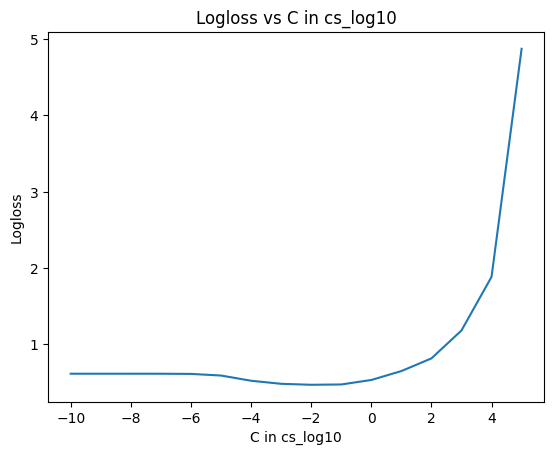

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot( x = cs_log10, y = l_loss_vals)
plt.title('Logloss vs C in cs_log10')
ax.set_xlabel('C in cs_log10')
ax.set_ylabel('Logloss')
plt.show()

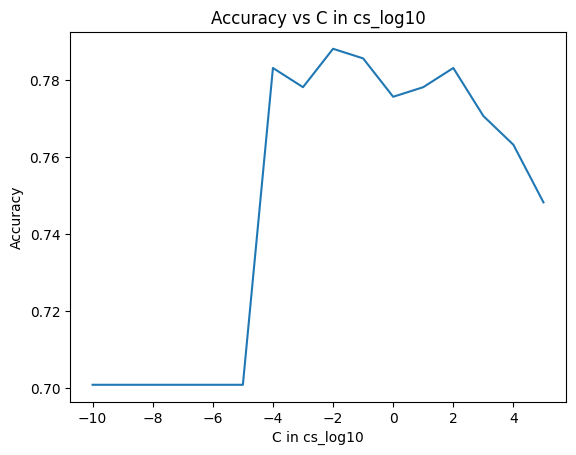

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot( x = cs_log10, y = acc_scores)
plt.title('Accuracy vs C in cs_log10')
ax.set_xlabel('C in cs_log10')
ax.set_ylabel('Accuracy')
plt.show()

In [22]:
a_fin_model, logloss, acc_score = train_test_LR(X_train, y_train, X_test, y_test, 0.1)
joblib.dump(a_fin_model, 's_lr_adhd_predict.pkl')

['s_lr_adhd_predict.pkl']

# PREDICTING SEX

In [23]:
y = sex
X = train_df.drop(columns=['participant_id'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
l_loss_vals = []
acc_scores = []
for c in cs:
    s_model, logloss, acc_score = train_test_LR(X_train, y_train, X_test, y_test, c)
    joblib.dump(s_model, 's_lr_sex_predict.pkl')
    print('C = ' + str(c))
    print('Logloss: ' + str(logloss))
    print('Accuracy: ' + str(acc_score))
    l_loss_vals.append(logloss)
    acc_scores.append(acc_score)

C = 1e-10
Logloss: 0.6488035001011229
Accuracy: 0.6483516483516484
C = 1e-09
Logloss: 0.6488036322255715
Accuracy: 0.6483516483516484
C = 1e-08
Logloss: 0.6488049520669327
Accuracy: 0.6483516483516484
C = 1e-07
Logloss: 0.6488170423935409
Accuracy: 0.6483516483516484
C = 1e-06
Logloss: 0.6488567142043073
Accuracy: 0.6483516483516484
C = 1e-05
Logloss: 0.6475645721692518
Accuracy: 0.6483516483516484
C = 0.0001
Logloss: 0.6374874516696069
Accuracy: 0.6510989010989011
C = 0.001
Logloss: 0.617412789859089
Accuracy: 0.6703296703296703
C = 0.01
Logloss: 0.6054729876548427
Accuracy: 0.6813186813186813
C = 0.1
Logloss: 0.5786299347150688
Accuracy: 0.7197802197802198
C = 1
Logloss: 0.5950405618806299
Accuracy: 0.7142857142857143
C = 10
Logloss: 0.6877563325419169
Accuracy: 0.7197802197802198
C = 100
Logloss: 0.834312739242268
Accuracy: 0.717032967032967
C = 1000
Logloss: 1.1749306341106147
Accuracy: 0.739010989010989
C = 10000
Logloss: 2.78606393419801
Accuracy: 0.717032967032967
C = 100000
Log

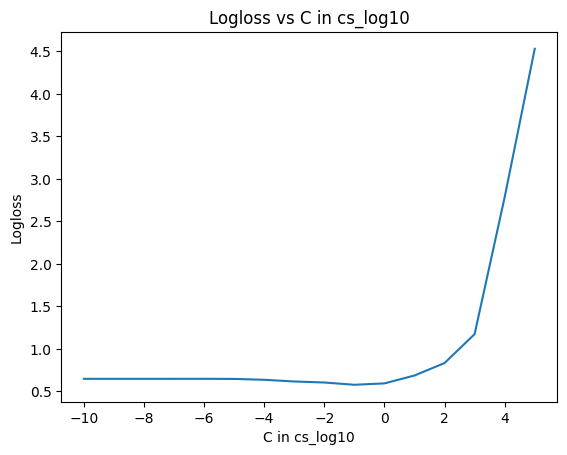

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot( x = cs_log10, y = l_loss_vals)
plt.title('Logloss vs C in cs_log10')
ax.set_xlabel('C in cs_log10')
ax.set_ylabel('Logloss')
plt.show()

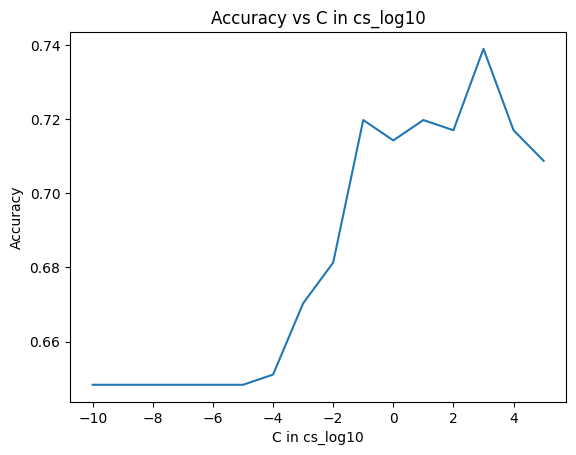

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot( x = cs_log10, y = acc_scores)
plt.title('Accuracy vs C in cs_log10')
ax.set_xlabel('C in cs_log10')
ax.set_ylabel('Accuracy')
plt.show()

In [28]:
s_fin_model, logloss, acc_score = train_test_LR(X_train, y_train, X_test, y_test, 1)
joblib.dump(s_fin_model, 's_lr_sex_predict.pkl')

['s_lr_sex_predict.pkl']

# NOW FOR THE TESTING ON THE TEST DATA

In [29]:
test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [30]:
test_df['ADHD_Outcome'] = ""
test_df

<ipython-input-30-a32913e6e860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = ""


,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910,
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409,
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977,
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929,
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538,
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675,
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359,
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819,


In [31]:
X = test_df.drop(columns=['participant_id', 'ADHD_Outcome'], axis=1)
test_df['ADHD_Outcome'] = a_fin_model.predict(X)
test_df['ADHD_Outcome']

<ipython-input-31-7a7a679bb2a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = a_fin_model.predict(X)


,ADHD_Outcome
0,1
1,1
2,0
3,1
4,1
...,...
299,1
300,1
301,1
302,1


In [32]:
test_df['Sex_F'] = ""
test_df

<ipython-input-32-0f8fdbae3754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = ""


,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910,1,
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409,1,
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977,0,
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929,1,
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538,1,
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675,1,
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359,1,
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819,1,


In [33]:
X = test_df.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
test_df['Sex_F'] = s_fin_model.predict(X)
test_df['Sex_F']

<ipython-input-33-5bdaa789e7a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = s_fin_model.predict(X)


,Sex_F
0,0
1,0
2,1
3,0
4,0
...,...
299,0
300,0
301,0
302,0


In [34]:
df = test_df[['participant_id', 'ADHD_Outcome', 'Sex_F']]
df

,participant_id,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,1,0
1,0Dua0TUw4sNZ,1,0
2,0ImS6uhE3Ie9,0,1
3,0VHL9SCh2TfC,1,0
4,0X2H4LroxZcw,1,0
...,...,...,...
299,ypPOBnAE3X5L,1,0
300,z0TcjaAHc8af,1,0
301,zHoI2y6ghT8f,1,0
302,zIkbsyNlTbCK,1,0


In [35]:
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1DT5jiAO8l-XWeN2n5Uk8RvuF1jZUaJoF/UCLA_WiDS_Team_2/DATA/TEST
/content/drive/.shortcut-targets-by-id/1DT5jiAO8l-XWeN2n5Uk8RvuF1jZUaJoF/UCLA_WiDS_Team_2/DATA


In [36]:
filename = 's_lr2_submission.csv'
df.to_csv(filename, index=False)